# importing libraries 

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output

from scipy import stats
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


# Data set 

In [ ]:
payroll = pd.read_csv("data.csv")
payroll

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,24,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,$17829.78,$17678.24,$22946.57,$14273.91,23.67%,$74584.48,$60310.57,$0.00,$0.00,$0.00,NaN,$369.12,$13904.79,$13904.79,NaN,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,$13859.93,$11968.32,$14048.20,$1700.40,3.43%,$51207.45,$49507.05,$1269.83,$0.00,$239.20,$0.00,$11.13,$180.24,$1689.27,24,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,$23479.20,$21153.60,$24360.49,$4120.20,4.85%,$89029.61,$84909.41,$1954.51,$0.00,$1519.00,$0.00,$482.29,$164.40,$3637.91,24,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,$18560.38,$16471.18,$21110.80,$14275.44,24.76%,$71936.24,$57660.80,$0.00,$1585.72,$935.00,$0.00,$11504.72,$250.00,$2770.72,12,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,$17313.10,$15257.17,$17313.10,$5191.62,8.74%,$64583.37,$59391.75,$0.00,$4774.25,$0.00,$0.00,$417.37,$0.00,$4774.25,3,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285003,285204,2016,Water And Power (DWP),NaN,112788496,Waterworks Mechanic Supervisor,Full Time,$57.32,$119684.16,$55484.82,$40483.89,$0.00,$0.00,$37801.25,64.99%,$95968.71,$58167.46,$0.00,$2223.34,$0.00,$0.00,$30861.05,$4716.86,$6940.20,B,Supervisory Blue Collar Unit,98,3987,NaN,$18144.43,$1248.19,$0.00,$19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf
285004,285205,2016,Water And Power (DWP),NaN,2560101653,Waterworks Mechanic Supervisor,Full Time,$58.76,$122690.88,$45921.05,$32986.77,$0.00,$0.00,$20740.49,35.66%,$78907.82,$58167.33,$0.00,$3548.21,$0.00,$0.00,$11941.36,$5250.92,$8799.13,B,Supervisory Blue Collar Unit,98,3987,NaN,$18144.43,$1248.19,$0.00,$19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf
285005,285206,2016,Water And Power (DWP),NaN,3792124730,Waterworks Mechanic Supervisor,Full Time,$58.76,$122690.88,$54746.99,$36433.31,$0.00,$0.00,$32971.11,56.64%,$91180.30,$58209.19,$0.00,$4157.49,$0.00,$0.00,$23962.96,$4850.66,$9008.15,B,Supervisory Blue Collar Unit,98,3987,NaN,$18144.43,$1248.19,$0.00,$19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf
285006,285207,2016,Water And Power (DWP),NaN,2425641362,Waterworks Mechanic Supervisor,Full Time,$58.76,$122690.88,$52753.23,$38925.91,$0.00,$0.00,$33060.46,56.40%,$91679.14,$58618.68,$0.00,$4160.13,$0.00,$0.00,$23596.38,$5303.95,$9464.08,B,Supervisory Blue Collar Unit,98,3987,NaN,$18144.43,$1248.19,$0.00,$19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf


# Data cleaning 

In [ ]:
payroll = payroll[pd.notnull(payroll['Payroll Department'])]
payroll.rename(columns={'Projected Annual Salary' : 'Annual_sal'}, inplace = True)
payroll.rename(columns={'Job Class Title' : 'Job_title'}, inplace = True)
payroll.rename(columns={'Base Pay' : 'Base_Pay'}, inplace = True)
payroll.replace(0,'NaN')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Row ID,Year,Department Title,Payroll Department,Record Number,Job_title,Employment Type,Hourly or Event Rate,Annual_sal,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base_Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,$13859.93,$11968.32,$14048.20,$1700.40,3.43%,$51207.45,$49507.05,$1269.83,$0.00,$239.20,$0.00,$11.13,$180.24,$1689.27,24,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,$23479.20,$21153.60,$24360.49,$4120.20,4.85%,$89029.61,$84909.41,$1954.51,$0.00,$1519.00,$0.00,$482.29,$164.40,$3637.91,24,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,$18560.38,$16471.18,$21110.80,$14275.44,24.76%,$71936.24,$57660.80,$0.00,$1585.72,$935.00,$0.00,$11504.72,$250.00,$2770.72,12,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,$17313.10,$15257.17,$17313.10,$5191.62,8.74%,$64583.37,$59391.75,$0.00,$4774.25,$0.00,$0.00,$417.37,$0.00,$4774.25,3,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf
6,59695,2014,Airports (LAWA),101.0,4237826094,Custodian - Airports,Full Time,$22.95,$47911.51,$13493.87,$14599.61,$12619.57,$24136.04,$20152.59,45.09%,$64849.09,$44696.50,$1327.95,$3592.50,$150.00,$0.00,$15082.14,$0.00,$5070.45,15,SERVICE EMPLOYEES UNIT,4,3156,A,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/3156.pdf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274156,274357,2016,Zoo,8702.0,1569372100,Zoo Veterinarian II,Part Time,$49.50,$103356.00,$0.00,$1262.25,$0.00,$0.00,$0.00,0.00%,$1262.25,$1262.25,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,10,Professional Medical,87,2367,2,$0.00,$0.00,$0.00,$0.00,City,http://per.lacity.org/perspecs/2367.pdf
274157,274358,2016,Zoo,8702.0,583720037,Zoo Veterinarian II,Part Time,$49.50,$103356.00,$24195.60,$5865.75,$0.00,$0.00,$0.00,0.00%,$30061.35,$30061.35,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,10,Professional Medical,87,2367,2,$0.00,$0.00,$0.00,$0.00,City,http://per.lacity.org/perspecs/2367.pdf
274158,274359,2016,Zoo,8702.0,2795932236,Zoo Veterinarian II,Part Time,$50.86,$106198.29,$4475.79,$6637.38,$0.00,$0.00,$297.42,2.75%,$11113.17,$10815.75,$0.00,$297.42,$0.00,$0.00,$0.00,$0.00,$297.42,10,Professional Medical,87,2367,2,$0.00,$0.00,$0.00,$0.00,City,http://per.lacity.org/perspecs/2367.pdf
274159,274360,2016,Zoo,8702.0,3627379422,Zoo Veterinarian II,Part Time,$49.50,$103356.00,$0.00,$2450.25,$0.00,$0.00,$0.00,0.00%,$2450.25,$2450.25,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,10,Professional Medical,87,2367,2,$0.00,$0.00,$0.00,$0.00,City,http://per.lacity.org/perspecs/2367.pdf


In [ ]:
for i in ['Annual_sal','Q1 Payments','Q2 Payments','Q3 Payments','Q4 Payments','Payments Over Base Pay',
          'Total Payments','Base_Pay','Permanent Bonus Pay','Longevity Bonus Pay','Temporary Bonus Pay','Overtime Pay',
          'Other Pay & Adjustments','Other Pay (Payroll Explorer)','Average Health Cost','Average Dental Cost',
          'Average Basic Life','Average Benefit Cost']:
    payroll[i] = payroll[i].str.replace('$','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
payroll

,Row ID,Year,Department Title,Payroll Department,Record Number,Job_title,Employment Type,Hourly or Event Rate,Annual_sal,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base_Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,52450.56,11331.00,13859.93,11968.32,14048.20,1700.40,3.43%,51207.45,49507.05,1269.83,0.00,239.20,$0.00,11.13,180.24,1689.27,24,POLICE OFFICERS UNIT,70,2214,A,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,89303.76,20036.32,23479.20,21153.60,24360.49,4120.20,4.85%,89029.61,84909.41,1954.51,0.00,1519.00,$0.00,482.29,164.40,3637.91,24,POLICE OFFICERS UNIT,70,2214,2,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,60028.96,15793.88,18560.38,16471.18,21110.80,14275.44,24.76%,71936.24,57660.80,0.00,1585.72,935.00,$0.00,11504.72,250.00,2770.72,12,SUPV BLUE COLLAR,42,3184,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,64553.13,14700.00,17313.10,15257.17,17313.10,5191.62,8.74%,64583.37,59391.75,0.00,4774.25,0.00,$0.00,417.37,0.00,4774.25,3,CLERICAL UNIT,82,1368,0,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/1368.pdf
6,59695,2014,Airports (LAWA),101.0,4237826094,Custodian - Airports,Full Time,$22.95,47911.51,13493.87,14599.61,12619.57,24136.04,20152.59,45.09%,64849.09,44696.50,1327.95,3592.50,150.00,$0.00,15082.14,0.00,5070.45,15,SERVICE EMPLOYEES UNIT,4,3156,A,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/3156.pdf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274156,274357,2016,Zoo,8702.0,1569372100,Zoo Veterinarian II,Part Time,$49.50,103356.00,0.00,1262.25,0.00,0.00,0.00,0.00%,1262.25,1262.25,0.00,0.00,0.00,$0.00,0.00,0.00,0.00,10,Professional Medical,87,2367,2,0.00,0.00,0.00,0.00,City,http://per.lacity.org/perspecs/2367.pdf
274157,274358,2016,Zoo,8702.0,583720037,Zoo Veterinarian II,Part Time,$49.50,103356.00,24195.60,5865.75,0.00,0.00,0.00,0.00%,30061.35,30061.35,0.00,0.00,0.00,$0.00,0.00,0.00,0.00,10,Professional Medical,87,2367,2,0.00,0.00,0.00,0.00,City,http://per.lacity.org/perspecs/2367.pdf
274158,274359,2016,Zoo,8702.0,2795932236,Zoo Veterinarian II,Part Time,$50.86,106198.29,4475.79,6637.38,0.00,0.00,297.42,2.75%,11113.17,10815.75,0.00,297.42,0.00,$0.00,0.00,0.00,297.42,10,Professional Medical,87,2367,2,0.00,0.00,0.00,0.00,City,http://per.lacity.org/perspecs/2367.pdf
274159,274360,2016,Zoo,8702.0,3627379422,Zoo Veterinarian II,Part Time,$49.50,103356.00,0.00,2450.25,0.00,0.00,0.00,0.00%,2450.25,2450.25,0.00,0.00,0.00,$0.00,0.00,0.00,0.00,10,Professional Medical,87,2367,2,0.00,0.00,0.00,0.00,City,http://per.lacity.org/perspecs/2367.pdf


# Remove outliers 

In [ ]:
payroll = payroll[payroll.Annual_sal != 0]  
payroll = payroll[payroll.Base_Pay != 0]
payroll.Annual_sal = payroll.Annual_sal.astype(float)
payroll.Base_Pay = payroll.Base_Pay.astype(float)


In [ ]:
pay_plot = payroll[['Annual_sal','Q1 Payments','Q2 Payments','Q3 Payments','Q4 Payments','Payments Over Base Pay',
          'Total Payments','Base_Pay','Permanent Bonus Pay','Longevity Bonus Pay','Temporary Bonus Pay','Overtime Pay',
          'Other Pay & Adjustments','Other Pay (Payroll Explorer)','Average Health Cost','Average Dental Cost',
          'Average Basic Life','Average Benefit Cost']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

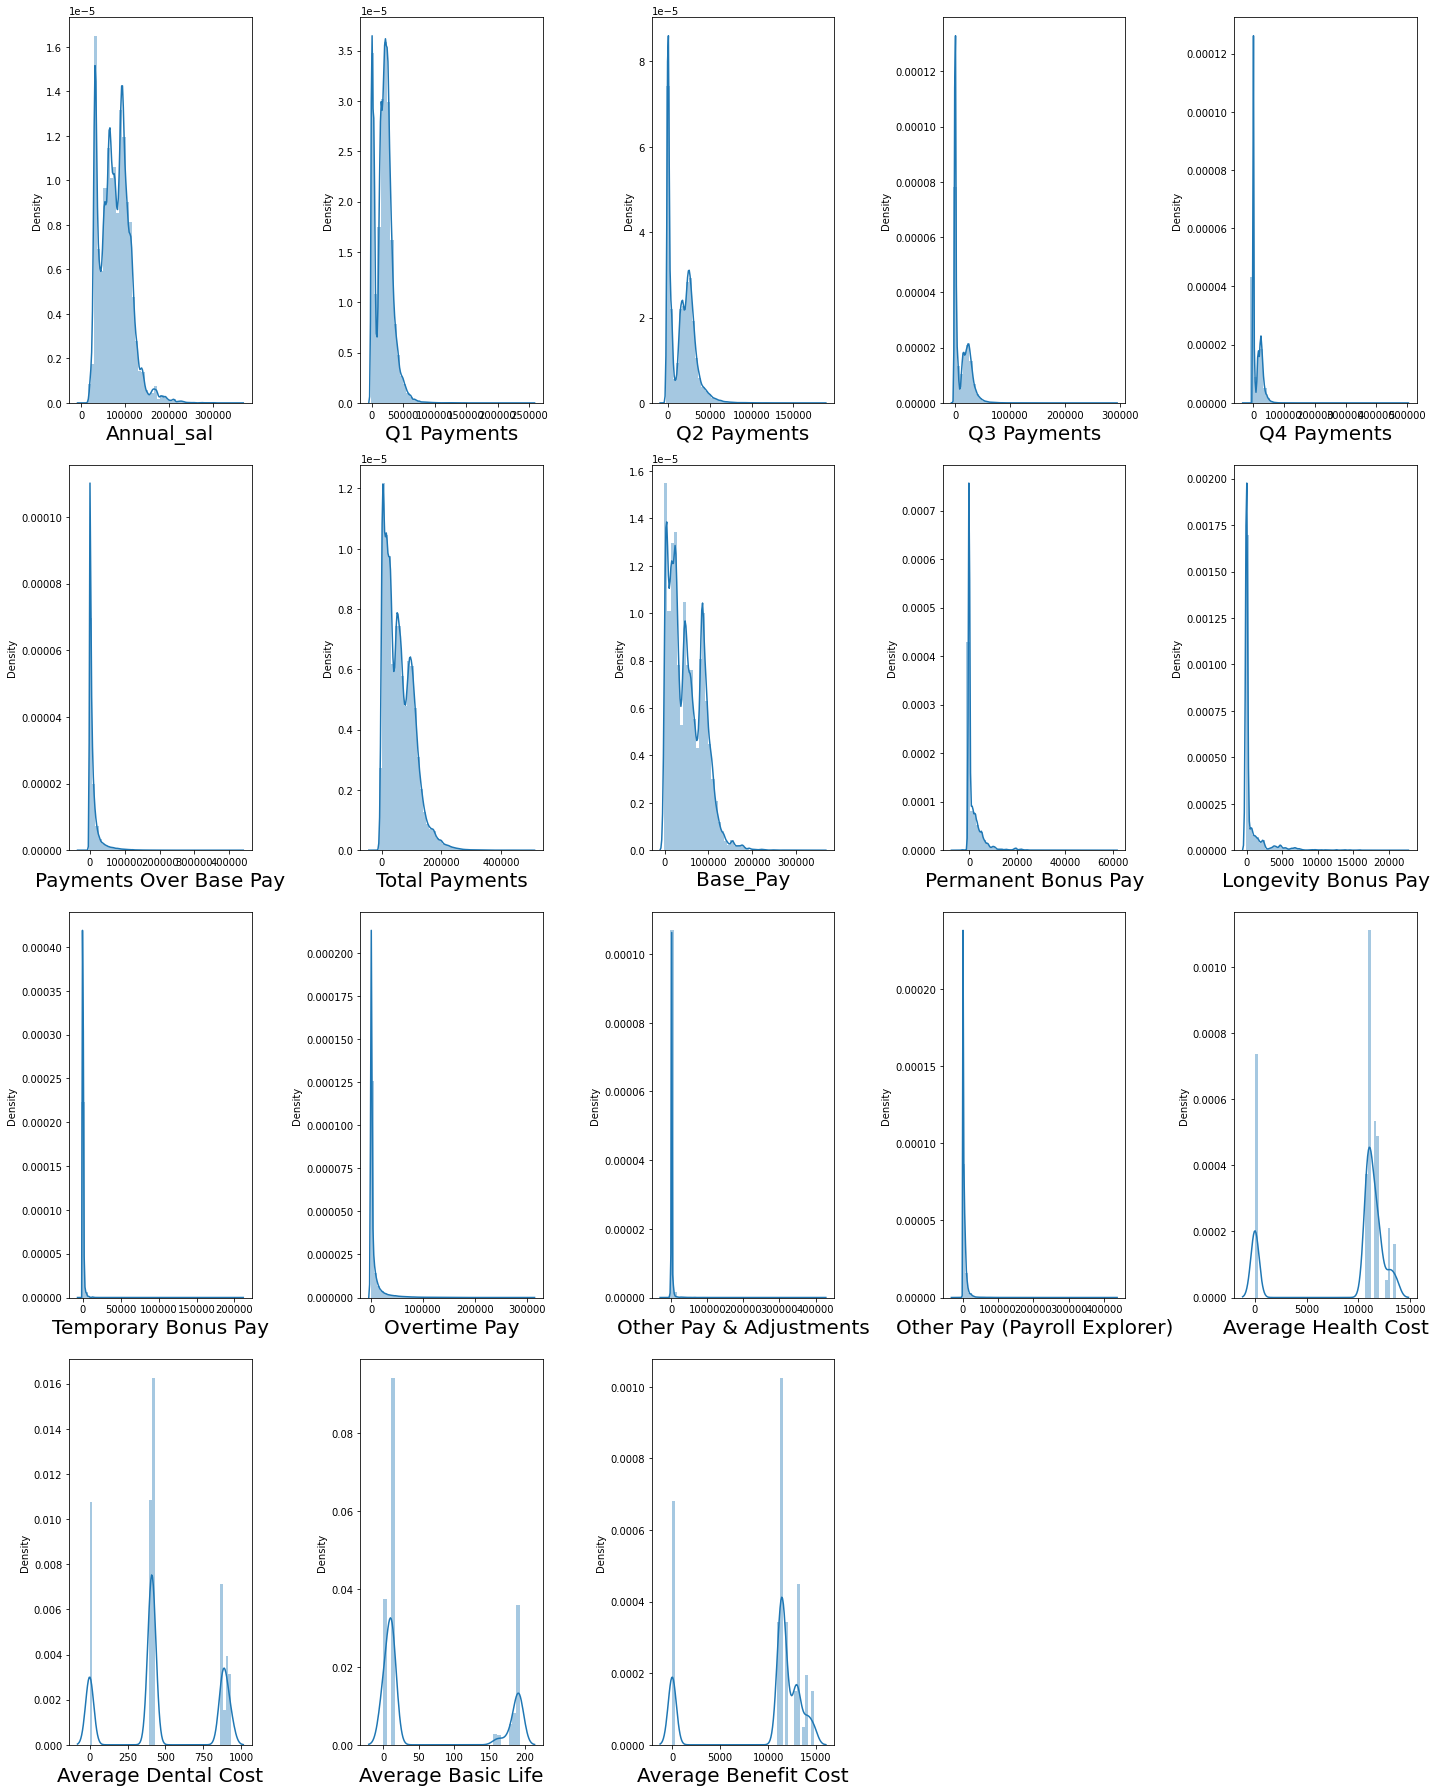

In [ ]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in pay_plot:
    if plotnumber<=20 :
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(pay_plot[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# creating different samples from the population

In [ ]:
payroll_2015 = payroll[payroll.Year ==2015]
payroll_2013 = payroll[payroll.Year ==2013]
payroll_2014 = payroll[payroll.Year ==2014]
payroll_2016=payroll[payroll.Year ==2016]


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

        Row ID  Year  ... Benefits Plan                           Job Class Link
32      114364  2015  ...           NaN  http://per.lacity.org/perspecs/1358.pdf
33      114365  2015  ...           NaN  http://per.lacity.org/perspecs/1358.pdf
34      114366  2015  ...           NaN  http://per.lacity.org/perspecs/1534.pdf
35      114367  2015  ...           NaN  http://per.lacity.org/perspecs/1534.pdf
44      114368  2015  ...           NaN  http://per.lacity.org/perspecs/1534.pdf
...        ...   ...  ...           ...                                      ...
237227    8367  2013  ...           NaN  http://per.lacity.org/perspecs/1535.pdf
237228    8368  2013  ...           NaN  http://per.lacity.org/perspecs/1535.pdf
237229    8369  2013  ...           NaN  http://per.lacity.org/perspecs/1535.pdf
237230    8370  2013  ...           NaN  http://per.lacity.org/perspecs/1535.pdf
237231    8371  2013  ...           NaN  http://per.lacity.org/perspecs/1535.pdf

[228390 rows x 35 columns]


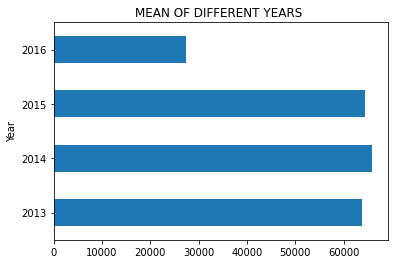

In [ ]:
frames = [payroll_2015,payroll_2014,payroll_2016,payroll_2013]
result = pd.concat(frames)
print(result)
df_basepay = result.groupby("Year").agg([np.mean, np.std])
pay = df_basepay['Base_Pay']


pay.head()
pay.plot(kind = "barh", y = "mean", legend = False,
            title = "MEAN OF DIFFERENT YEARS ")


In [ ]:
payroll_2014_elec = payroll_2014[payroll_2014.Job_title == 'Electrician']
payroll_2015_elec = payroll_2015[payroll_2015.Job_title == 'Electrician']
payroll_2013_elec = payroll_2013[payroll_2013.Job_title == 'Electrician']

In [ ]:
q1 = payroll_2014_elec['Base_Pay'].quantile(0.90)
# we are removing the top 10% data from the Pregnancies column
payroll_2014_elec_cleaned =(payroll_2014_elec[payroll_2014_elec['Base_Pay']<q1])
skew2014= (np.array(np.sqrt(np.log(payroll_2014_elec_cleaned['Base_Pay']))))
q2 = payroll_2015_elec['Base_Pay'].quantile(0.97)
# we are removing the top 3% data from the Pregnancies column
payroll_2015_elec_cleaned =(payroll_2015_elec[payroll_2015_elec['Base_Pay']<q2])
skew2015= (np.array(np.sqrt(np.log(payroll_2015_elec_cleaned['Base_Pay']))))
q3 = payroll_2013_elec['Base_Pay'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
payroll_2013_elec_cleaned =(payroll_2013_elec[payroll_2013_elec['Base_Pay']<q3])

skew2013= (np.array((np.sqrt(np.log(payroll_2013_elec_cleaned['Base_Pay'])))))

q4 = payroll_2016_elec['Base_Pay'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
payroll_2016_elec_cleaned =(payroll_2016_elec[payroll_2016_elec['Base_Pay']<q4])

skew2016= (np.array((np.sqrt(np.log(payroll_2016_elec_cleaned['Base_Pay'])))))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

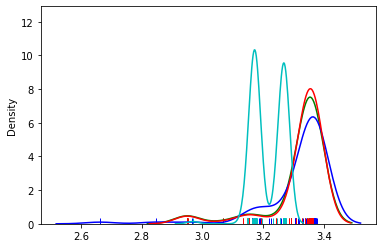

In [ ]:
#scalar = StandardScaler()
#pay2014_scaled = scalar.fit_transform((skew2014).reshape(-1,1))


sns.distplot(skew2014, hist=False, rug=True,color='g')
sns.distplot(skew2015,hist=False, rug=True, color='b')
sns.distplot(skew2013,hist=False, rug=True,color='r')
sns.distplot(skew2016,hist=False, rug=True, color ='c' )
plt.show()

In [ ]:

sam_1 = pd.DataFrame(skew2014).sample(frac=0.04)

#print("Sample Mean 2014 "+str(sample_elec_mean_2014))
sam_2 = pd.DataFrame(skew2015).sample(frac=0.06)

#print("Sample Mean 2015 "+str(sample_elec_mean_2015))
sam_3 =pd.DataFrame(skew2013).sample(frac=0.07)


#The means from three different samples are compared using ANOVA using statistics learnt in the class

In [ ]:
n1 = len(sam_1)
n2 = len(sam_2)
n3 = len(sam_3)
print(n1,n2,n3)
N = n1+n2+n3
listN=[n1,n2,n3]
print(N)

3 5 6
14


In [ ]:
x1_bar =float(sam_1.mean())
x2_bar =float(sam_2.mean())
x3_bar =float( sam_3.mean())
print('x1_bar is ',x1_bar)
print('x2_bar is', x2_bar)
print('x3_bar is ', x3_bar)

x1_bar is  3.285866420816967
x2_bar is 3.3640522662936205
x3_bar is  3.3464907703363878


In [ ]:
x1_square_sum=0
for i in sam_1:
  x1_square_sum = x1_square_sum + (i-x1_bar)**2
x2_square_sum=0
for i in sam_2:
  x2_square_sum = x2_square_sum + (i-x2_bar)**2
x3_square_sum=0
for i in sam_3:
  x3_square_sum = x3_square_sum + (i-x3_bar)**2


In [ ]:
grand_mean= (x1_bar*n1 +  x2_bar*n2 + x3_bar*n3)/N

In [ ]:
bss = n1*((x1_bar-grand_mean)**2) + n2*((x2_bar-grand_mean)**2) + n3*((x3_bar- grand_mean)**2)
print(bss)

0.011935942306065449


In [ ]:
wss = x1_square_sum+ x2_square_sum + x3_square_sum
print(wss)

33.312766261754376


In [ ]:
f = (bss/wss)* ((N-len(listN))/(len(listN)-1))
f


0.0019706463932636113

In [ ]:
F_2_11 = 2.8595 # for p=0.05

In [ ]:
if f > F_2_16:
  print('reject the null hypothesis : average salary of 3 years of electricians is different with 5% significance level ')
else:
  print('accept  the null hypothesis : average salary of 3 years of electricians is same  with 5% significance level')

accept  the null hypothesis : average salary of 3 years of electricians is same  with 5% significance level


# Conclusion : Hence we conclude that , the result of accept hypothesis has been verified by two methods , i.e through mathematical modelling and using graph 